# 네트워크 과학 기초

`networkx` 라이브러리를 이용하여 기본 네트워크 생성부터 랜덤 및 바라바시-알버트 네트워크, 커뮤니티 탐색까지 실습합니다.




---

# 1.NetworkX 소개 및 노드·링크 연결

- **NetworkX**: 파이썬 기반 네트워크(그래프) 이론 연구 및 분석 라이브러리  
- **노드(Node)**: 그래프의 점  
- **엣지(Edge)/링크(Link)**: 노드 간 연결



## 설치 및 불러오기

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## 간단한 그래프 생성 예시

In [23]:
# 빈 그래프 생성
g = nx.Graph()

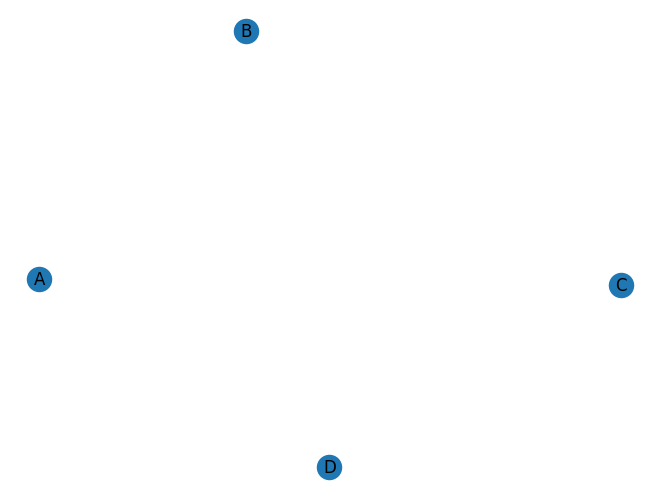

In [24]:
# 노드 추가
g.add_node('A')
g.add_nodes_from(['B', 'C', 'D'])

nx.draw(g, with_labels=True)
plt.show()

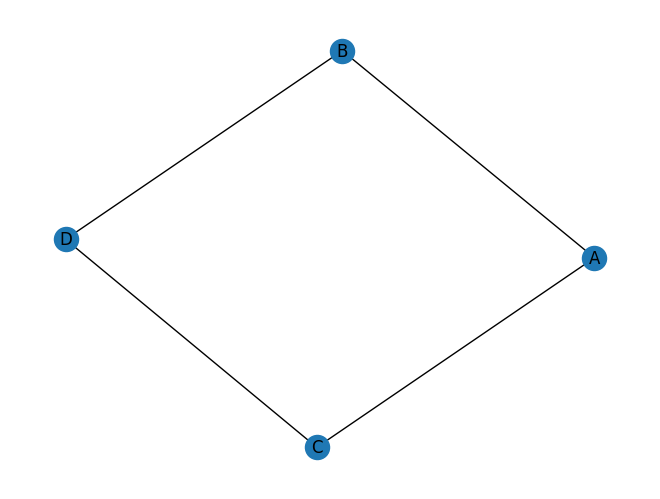

In [25]:
# 엣지 추가
g.add_edge('A', 'B')
g.add_edges_from([('A', 'C'), ('B', 'D'), ('C', 'D')])

nx.draw(g, with_labels=True)
plt.show()

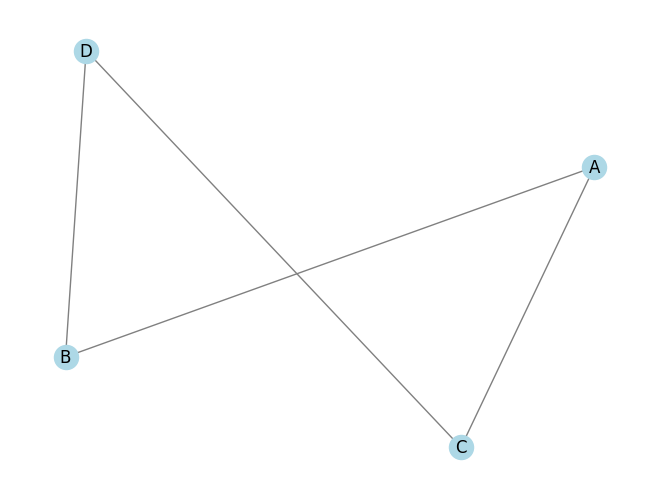

In [26]:
# 그래프 그리기
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

## 다른 예시

In [4]:
print(open('../content/friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



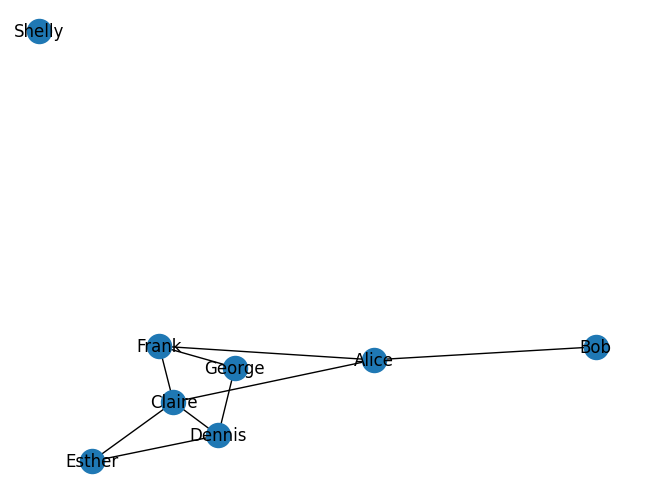

In [20]:
SG = nx.read_adjlist('../content/friends.adjlist')
nx.draw(SG, with_labels=True)


---

# 2.랜덤 네트워크와 바라바시-알버트 네트워크 생성

### 2.1 Erdős–Rényi 랜덤 그래프
- 각 노드 쌍이 확률 $p$ 로 연결되는 그래프

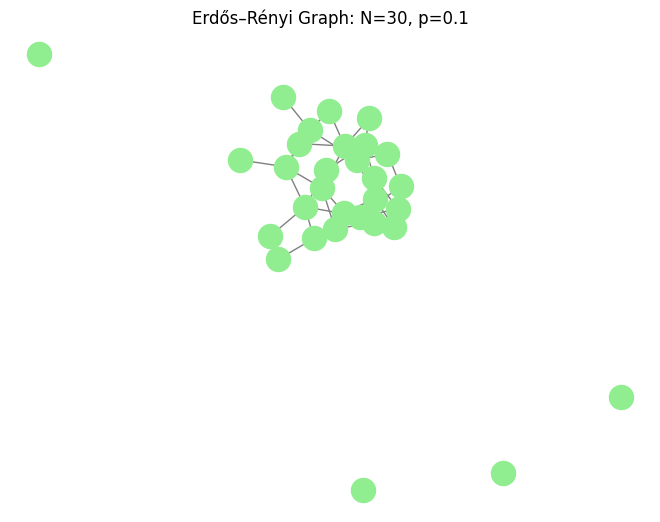

In [7]:
# 노드 수 N, 연결 확률 p
N = 30
p = 0.1

# 생성
er_graph = nx.erdos_renyi_graph(N, p)

# 시각화
pos = nx.spring_layout(er_graph)
nx.draw(er_graph, pos, node_color='lightgreen', edge_color='gray', node_size=300)
plt.title(f"Erdős–Rényi Graph: N={N}, p={p}")
plt.show()

### 2.2 Barabási–Albert (BA) 네트워크
- 성장 + preferential attachment (우선 연결) 기법


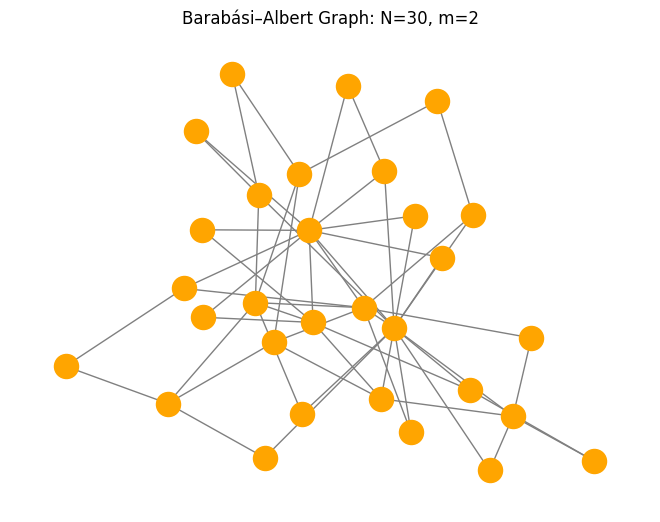

In [8]:
# 초기 연결 m0, 매 단계 추가 엣지 수 m, 최종 노드 수 N
N = 30
m = 2

# 생성
ba_graph = nx.barabasi_albert_graph(N, m)

# 시각화
pos = nx.spring_layout(ba_graph)
nx.draw(ba_graph, pos, node_color='orange', edge_color='gray', node_size=300)
plt.title(f"Barabási–Albert Graph: N={N}, m={m}")
plt.show()

### 2.3 Degree Distribution 시각화

- **Degree**: 노드에 연결된 엣지의 수
- **Degree Distribution**: 그래프의 각 DEGREE 값에 해당하는 노드 비율

In [14]:
N = 30
m = 2
g = nx.barabasi_albert_graph(N, m)

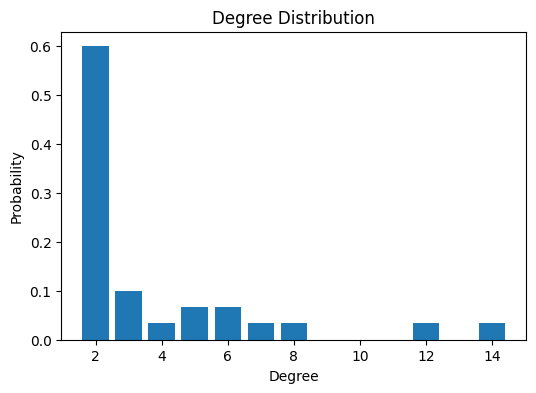

In [15]:
# Degree 리스트 생성
degrees = [d for n, d in g.degree()]

# Degree 빈도 계산
import collections
degree_count = collections.Counter(degrees)

# 분포 데이터 준비
deg, cnt = zip(*sorted(degree_count.items()))
prob = [c / sum(cnt) for c in cnt]

# 시각화
plt.figure(figsize=(6,4))
plt.bar(deg, prob)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution')
plt.show()

---

# 3.커뮤니티 탐색 예시
- **커뮤니티 탐색**: 그래프에서 밀집된 서브그래프(클러스터)를 찾는 기법  
- 여기서는 **Girvan–Newman 알고리즘** 간단 구현을 사용

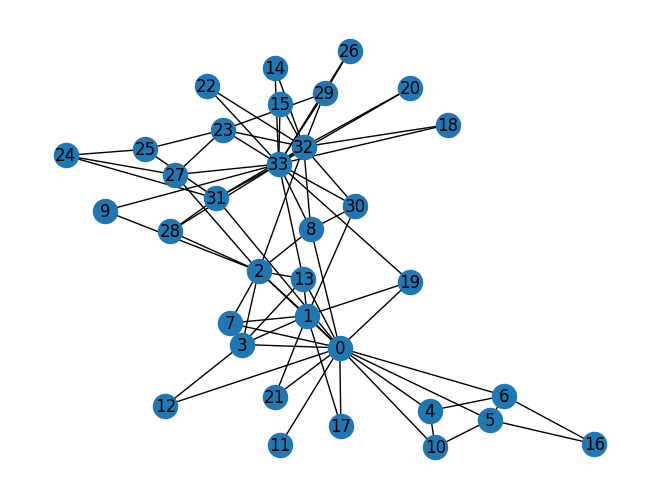

In [13]:
from networkx.algorithms import community

# 샘플 그래프로 커뮤니티 탐색 (Zachary's Karate Club)
G = nx.karate_club_graph()
nx.draw(G, pos, with_labels=True)

In [11]:
# Girvan–Newman 알고리즘 적용
comp_generator = community.girvan_newman(G)
# 상위 2개 커뮤니티 분할 결과 선택
limited = tuple(sorted(c) for c in next(comp_generator))
print("발견된 커뮤니티:", limited)

발견된 커뮤니티: ([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


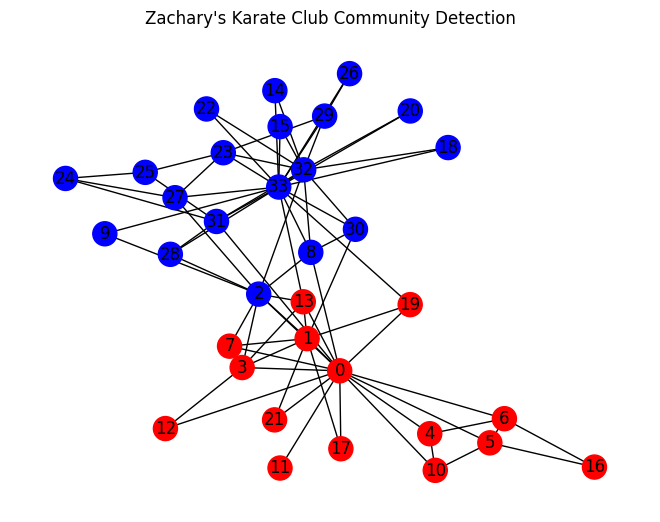

In [12]:
# 시각화: 서로 다른 색상으로 표시
colors = ['red' if node in limited[0] else 'blue' for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.title("Zachary's Karate Club Community Detection")
plt.show()